In [1]:
# import preliminary packages to be used for immediate data cleaning and exploration
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read in CSV to pandas DataFrame, handle missing values and reset index
telcom_data = pd.read_csv('telcom_data.csv')
telcom_data.TotalCharges = telcom_data.TotalCharges.replace(' ',np.nan,regex=True)
telcom_data = telcom_data.dropna()
telcom_data = telcom_data.reset_index()
telcom_data = telcom_data.drop('index',axis=1)

# convert columns to appropriate data types
telcom_data.customerID = telcom_data.customerID.astype('str')
telcom_data.gender = telcom_data.gender.astype('category')
telcom_data.SeniorCitizen = telcom_data.SeniorCitizen.astype('category')
telcom_data.Partner = telcom_data.Partner.astype('category')
telcom_data.Dependents = telcom_data.Dependents.astype('category')
telcom_data.tenure = telcom_data.tenure.astype('int')
telcom_data.PhoneService = telcom_data.PhoneService.astype('category')
telcom_data.MultipleLines = telcom_data.MultipleLines.astype('category')
telcom_data.InternetService = telcom_data.InternetService.astype('category')
telcom_data.OnlineSecurity = telcom_data.OnlineSecurity.astype('category')
telcom_data.OnlineBackup = telcom_data.OnlineBackup.astype('category')
telcom_data.DeviceProtection = telcom_data.DeviceProtection.astype('category')
telcom_data.TechSupport = telcom_data.TechSupport.astype('category')
telcom_data.StreamingTV = telcom_data.StreamingTV.astype('category')
telcom_data.StreamingMovies = telcom_data.StreamingMovies.astype('category')
telcom_data.Contract = telcom_data.Contract.astype('category')
telcom_data.PaperlessBilling = telcom_data.PaperlessBilling.astype('category')
telcom_data.PaymentMethod = telcom_data.PaymentMethod.astype('category')
telcom_data.TotalCharges = pd.to_numeric(telcom_data.TotalCharges)
telcom_data.Churn = telcom_data.Churn.astype('category')

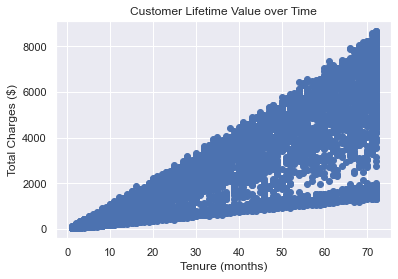

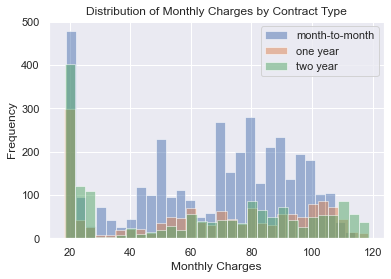

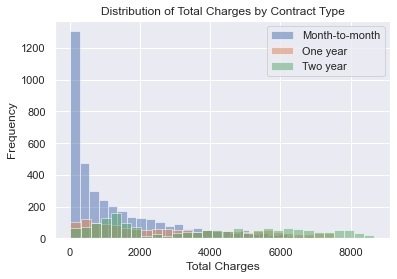

In [2]:
# set default plotting style throughout program
sns.set()

# scatter plot showing strong correlation between tenure and total charges (lifetime value)
plt.scatter(telcom_data.tenure, telcom_data.TotalCharges)
plt.xlabel('Tenure (months)')
plt.ylabel('Total Charges ($)')
plt.title ('Customer Lifetime Value over Time')
plt.show()

# dividing data out by contract type for monthly charges plots
monthly_charge_month = telcom_data.MonthlyCharges[telcom_data.Contract == 'Month-to-month']
monthly_charge_year = telcom_data.MonthlyCharges[telcom_data.Contract == 'One year']
monthly_charge_two_year = telcom_data.MonthlyCharges[telcom_data.Contract == 'Two year']

# plotting hist of monthly charges by contract type
plt.hist(monthly_charge_month,alpha=0.5,bins=30,label='month-to-month')
plt.hist(monthly_charge_year,alpha=0.5,bins=30,label='one year')
plt.hist(monthly_charge_two_year,alpha=0.5,bins=30,label='two year')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges by Contract Type')
plt.legend()
plt.show()

# dividing data out by contract type for monthly charges plots
total_charge_month = telcom_data.TotalCharges[telcom_data.Contract == 'Month-to-month']
total_charge_year = telcom_data.TotalCharges[telcom_data.Contract == 'One year']
total_charge_two_year = telcom_data.TotalCharges[telcom_data.Contract == 'Two year']

# plotting hist of total charges by contract type
plt.hist(total_charge_month,alpha=0.5,bins=30,label='Month-to-month')
plt.hist(total_charge_year,alpha=0.5,bins=30,label='One year')
plt.hist(total_charge_two_year,alpha=0.5,bins=30,label='Two year')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charges by Contract Type')
plt.legend()
plt.show()

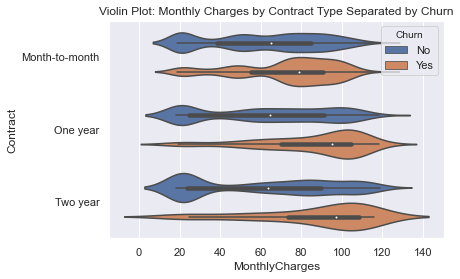

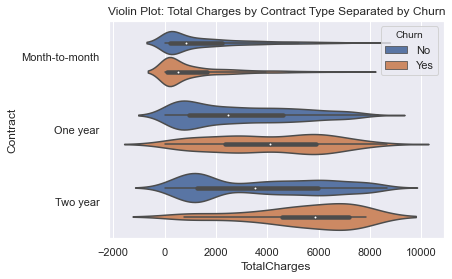

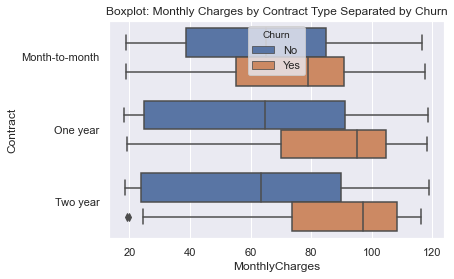

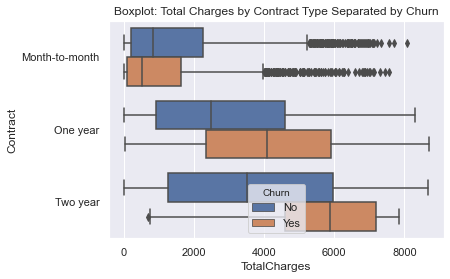

In [3]:
# violin plots to get a different view of the distribution of charges by contract type
# and seeing how these different subsets of customers churn
sns.violinplot(x='MonthlyCharges',y='Contract',hue='Churn',data=telcom_data)
plt.title('Violin Plot: Monthly Charges by Contract Type Separated by Churn')
plt.show()
sns.violinplot(x='TotalCharges',y='Contract',hue='Churn',data=telcom_data)
plt.title('Violin Plot: Total Charges by Contract Type Separated by Churn')
plt.show()

# boxplots to get a different view of the distribution of charges by contract type
# and seeing how these different subsets of customers churn
sns.boxplot(x='MonthlyCharges',y='Contract',hue='Churn',data=telcom_data)
plt.title('Boxplot: Monthly Charges by Contract Type Separated by Churn')
plt.show()
sns.boxplot(x='TotalCharges',y='Contract',hue='Churn',data=telcom_data)
plt.title('Boxplot: Total Charges by Contract Type Separated by Churn')
plt.show()

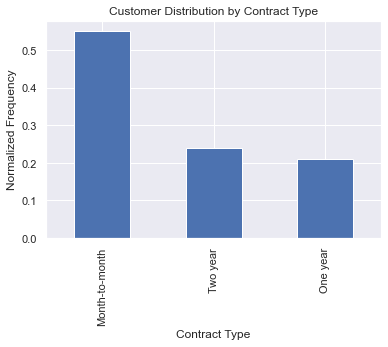

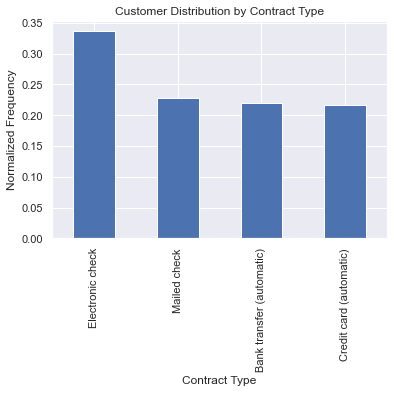

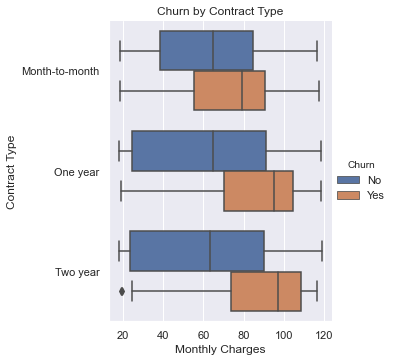

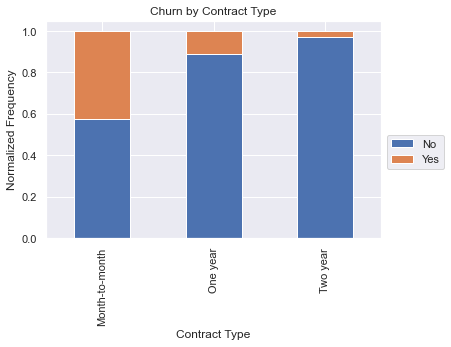

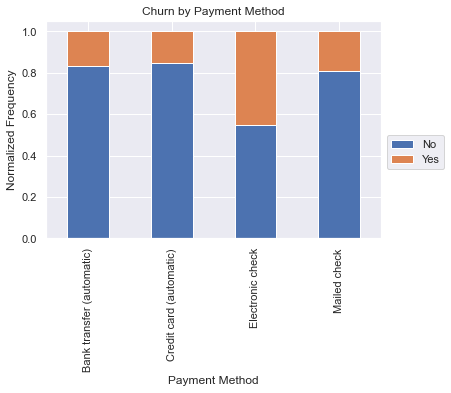

In [4]:
# plots normalized histogram so we can see what proportion of customers had which contracts
telcom_data.Contract.value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Contract Type')
plt.ylabel('Normalized Frequency')
plt.title('Customer Distribution by Contract Type')
plt.show()

# plots normalized histogram so we can see what proportion of customers paid with which payment methods
telcom_data.PaymentMethod.value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Contract Type')
plt.ylabel('Normalized Frequency')
plt.title('Customer Distribution by Contract Type')
plt.show()

# box and whisker plot of contract type separated by whether a customer churned or not
sns.catplot(x='MonthlyCharges',y='Contract',hue='Churn',data=telcom_data,kind='box')
plt.xlabel('Monthly Charges')
plt.ylabel('Contract Type')
plt.title('Churn by Contract Type')
plt.show()

# normalized bar graph of contract type split by churn
churn_by_contract = telcom_data.groupby('Contract').Churn.value_counts(normalize=True)
churn_by_contract.unstack().plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.0,0.5))
plt.xlabel('Contract Type')
plt.ylabel('Normalized Frequency')
plt.title('Churn by Contract Type')
plt.show()

# normalized bar graph of payment methods split by churn
churn_by_payment = telcom_data.groupby('PaymentMethod').Churn.value_counts(normalize=True)
churn_by_payment.unstack().plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.0,0.5))
plt.xlabel('Payment Method')
plt.ylabel('Normalized Frequency')
plt.title('Churn by Payment Method')
plt.show()

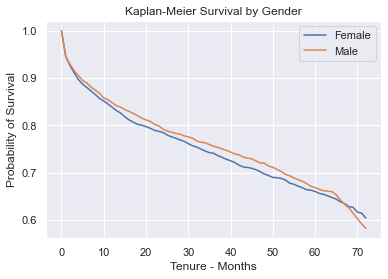

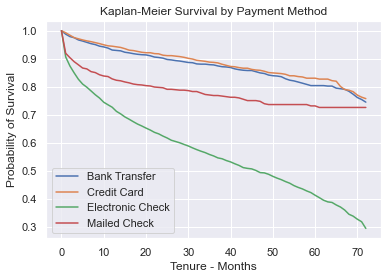

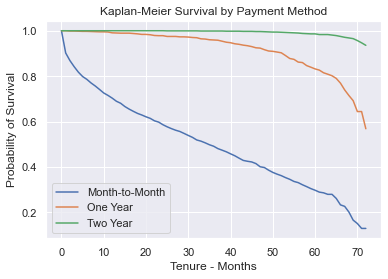

In [5]:
# import appropriate packages for survival curve analysis
from pysurvival.models.non_parametric import KaplanMeierModel
from sklearn.preprocessing import LabelEncoder

# convert all categorical variables into integer representations using LabelEncoder
le_gender = LabelEncoder()
telcom_data.gender = le_gender.fit_transform(telcom_data.gender)
le_senior = LabelEncoder()
telcom_data.SeniorCitizen = le_senior.fit_transform(telcom_data.SeniorCitizen)
le_partner = LabelEncoder()
telcom_data.Partner = le_partner.fit_transform(telcom_data.Partner)
le_dependents = LabelEncoder()
telcom_data.Dependents = le_dependents.fit_transform(telcom_data.Dependents)
le_phone = LabelEncoder()
telcom_data.PhoneService = le_phone.fit_transform(telcom_data.PhoneService)
le_multi = LabelEncoder()
telcom_data.MultipleLines = le_multi.fit_transform(telcom_data.MultipleLines)
le_internet = LabelEncoder()
telcom_data.InternetService = le_internet.fit_transform(telcom_data.InternetService)
le_security = LabelEncoder()
telcom_data.OnlineSecurity = le_security.fit_transform(telcom_data.OnlineSecurity)
le_backup = LabelEncoder()
telcom_data.OnlineBackup = le_backup.fit_transform(telcom_data.OnlineBackup)
le_protection = LabelEncoder()
telcom_data.DeviceProtection = le_protection.fit_transform(telcom_data.DeviceProtection)
le_support = LabelEncoder()
telcom_data.TechSupport = le_support.fit_transform(telcom_data.TechSupport)
le_s_tv = LabelEncoder()
telcom_data.StreamingTV = le_s_tv.fit_transform(telcom_data.StreamingTV)
le_s_movie = LabelEncoder()
telcom_data.StreamingMovies = le_s_movie.fit_transform(telcom_data.StreamingMovies)
le_contract = LabelEncoder()
telcom_data.Contract = le_contract.fit_transform(telcom_data.Contract)
le_billing = LabelEncoder()
telcom_data.PaperlessBilling = le_billing.fit_transform(telcom_data.PaperlessBilling)
le_payment = LabelEncoder()
telcom_data.PaymentMethod = le_payment.fit_transform(telcom_data.PaymentMethod)
le_churn = LabelEncoder()
telcom_data.Churn = le_churn.fit_transform(telcom_data.Churn)

# setting up arrays for use in the KaplainMeierModel below
# T is the array of values representing time, in our case tenure
# E is the array of values representing whether an event occurred or not, 
# in our case 0 refers to a customer who did not churn, 1 refers to a customer who did churn
# first, take a look at survival rates by gender
T_male = telcom_data[telcom_data.gender == 1].tenure
E_male = telcom_data[telcom_data.gender== 1].Churn
T_female = telcom_data[telcom_data.gender == 0].tenure
E_female = telcom_data[telcom_data.gender == 0].Churn

# plug in appropriate T and E data and fit KM survival models
km_male_model = KaplanMeierModel()
km_male_model.fit(T_male, E_male, alpha=0.95)
km_female_model = KaplanMeierModel()
km_female_model.fit(T_female, E_female, alpha=0.95)

# use the .times and .survival attributes from fitted KM model to graph
# corresponding survival curves for males and females
plt.plot(km_female_model.times, km_female_model.survival,label='Female')
plt.plot(km_male_model.times, km_male_model.survival,label='Male')
plt.xlabel('Tenure - Months')
plt.ylabel('Probability of Survival')
plt.title('Kaplan-Meier Survival by Gender')
plt.legend()
plt.show()

# next set up T and E arrays to look at survival by payment method
T_bank_transfer = telcom_data[telcom_data.PaymentMethod == 0].tenure
E_bank_transfer = telcom_data[telcom_data.PaymentMethod == 0].Churn
T_credit_card = telcom_data[telcom_data.PaymentMethod == 1].tenure
E_credit_card = telcom_data[telcom_data.PaymentMethod == 1].Churn
T_e_check = telcom_data[telcom_data.PaymentMethod == 2].tenure
E_e_check = telcom_data[telcom_data.PaymentMethod == 2].Churn
T_mail_check = telcom_data[telcom_data.PaymentMethod == 3].tenure
E_mail_check = telcom_data[telcom_data.PaymentMethod == 3].Churn

# fit KM survival models for each payment method
km_bank_transfer_model = KaplanMeierModel()
km_bank_transfer_model.fit(T_bank_transfer, E_bank_transfer)
km_credit_card_model = KaplanMeierModel()
km_credit_card_model.fit(T_credit_card, E_credit_card)
km_e_check_model = KaplanMeierModel()
km_e_check_model.fit(T_e_check, E_e_check)
km_mail_check_model = KaplanMeierModel()
km_mail_check_model.fit(T_mail_check, E_mail_check)

# plot survival curves for each payment method
plt.plot(km_bank_transfer_model.times, km_bank_transfer_model.survival,label='Bank Transfer')
plt.plot(km_credit_card_model.times, km_credit_card_model.survival,label='Credit Card')
plt.plot(km_e_check_model.times, km_e_check_model.survival,label='Electronic Check')
plt.plot(km_mail_check_model.times, km_mail_check_model.survival,label='Mailed Check')
plt.xlabel('Tenure - Months')
plt.ylabel('Probability of Survival')
plt.title('Kaplan-Meier Survival by Payment Method')
plt.legend()
plt.show()

# set up T and E arrays to look at survival by contract type
T_month = telcom_data[telcom_data.Contract == 0].tenure
E_month = telcom_data[telcom_data.Contract == 0].Churn
T_year = telcom_data[telcom_data.Contract == 1].tenure
E_year = telcom_data[telcom_data.Contract == 1].Churn
T_two_year = telcom_data[telcom_data.Contract == 2].tenure
E_two_year = telcom_data[telcom_data.Contract == 2].Churn

# fit KM survival models for each contract type
km_month_model = KaplanMeierModel()
km_month_model.fit(T_month, E_month)
km_year_model = KaplanMeierModel()
km_year_model.fit(T_year, E_year)
km_two_year_model = KaplanMeierModel()
km_two_year_model.fit(T_two_year, E_two_year)

# plot survival curves for each contract type
plt.plot(km_month_model.times, km_month_model.survival,label='Month-to-Month')
plt.plot(km_year_model.times, km_year_model.survival,label='One Year')
plt.plot(km_two_year_model.times, km_two_year_model.survival,label='Two Year')
plt.xlabel('Tenure - Months')
plt.ylabel('Probability of Survival')
plt.title('Kaplan-Meier Survival by Payment Method')
plt.legend()
plt.show()

In [6]:
# import all packages to be used for machine learning analysis
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import integrated_brier_score

# set up X and y arrays to be used in sklearn ML algorithms
X = telcom_data.drop(['Churn','customerID'],axis=1)
y = telcom_data['Churn'].values
y = y.astype('int')

# define train/test split for ML models as well as cross-validation procedure
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=42,stratify=y)
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=21)

def fit_model(X_train, y_train, model):
    '''Fits an ML model and then uses the .predict() method to generate predictions
    for the binary classification as well as associated probabilities and returns those 
    predictions in a tuple'''
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    return (y_pred, y_pred_prob)

def roc_plot(y_test,y_pred_prob,title='ROC Curve'):
    '''Plots the ROC curve associated with classification probabilities
    generated from a ML model'''
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0,1],[0,1],'k--',color='blue')
    plt.plot(fpr,tpr,label='ROC-AUC: %0.2f'%roc_auc_score(y_test, y_pred_prob))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

def pr_plot(y_test,y_pred_prob,title='Precision Recall Curve'):
    '''Plots the ROC curve associated with classification probabilities
    generated from a ML model'''
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.plot([1,0],[0,1],'k--',color='red')
    plt.plot(recall,precision,label='PR AUC: %0.2f'%(auc(recall,precision)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend()
    plt.show()
    

def model_stats(y_test,y_pred,y_pred_prob, model='Model'):
    '''Outputs summary statistics useful for comparing different ML models and their
    relative performance. Also outputs associated confusion matrix and classification report'''
    print("Tuned {} ROC-AUC score: {:0.2f}".format(model,roc_auc_score(y_test, y_pred_prob)))
    print("Tuned {} Precision Recall AUC score: {:0.2f}".format(model,average_precision_score(y_test, y_pred_prob)))
    print("Accuracy of tuned {}: {:0.2f}".format(model,accuracy_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

def model_run_all(X_train,y_train,y_test,model,model_name='Model'):
    '''Combines ML process into one function by using calls to fit_model(), roc_plot(), pr_plot()
    and model_stats() to provide cohesive ML model analysis'''
    y_pred, y_pred_prob = fit_model(X_train,y_train,model)
    roc_plot(y_test,y_pred_prob,title="{} ROC Curve".format(model_name))
    pr_plot(y_test,y_pred_prob,title="{} Precision Recall Curve".format(model_name))
    model_stats(y_test, y_pred, y_pred_prob,model=model_name)
    return y_pred, y_pred_prob

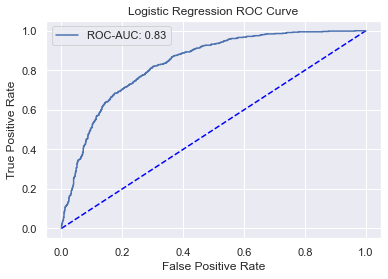

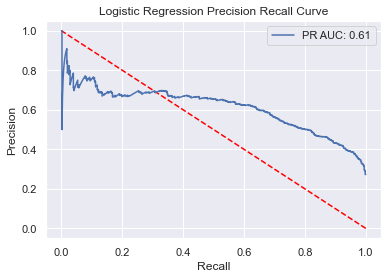

Tuned Logistic Regression ROC-AUC score: 0.83
Tuned Logistic Regression Precision Recall AUC score: 0.61
Accuracy of tuned Logistic Regression: 0.80
[[1378  171]
 [ 255  306]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110

Tuned Logistic Regression Parameter: {'LogisticRegression__C': 0.1}


In [7]:
# Logistic Regression model: define C space for hyperparameter tuning, scale data, use GridSearchCV to find
# optimal C value and then apply model_run_all and store y predictions and y predicted probabilities
c_space = [.0001,.001,.1,1,10,100]
param_grid = {'LogisticRegression__C':c_space}
steps_logreg = [('scaler',preprocessing.StandardScaler()),('LogisticRegression',LogisticRegression())]
pipeline_logreg = Pipeline(steps_logreg)
logreg_cv = GridSearchCV(pipeline_logreg, param_grid,cv=cv,scoring='accuracy')
y_logreg_pred, y_logreg_pred_prob = model_run_all(X_train, y_train, y_test, logreg_cv,model_name='Logistic Regression')
#shows what the optimal C value from grid search
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))

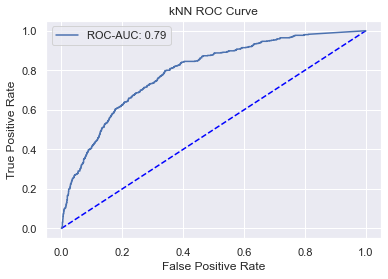

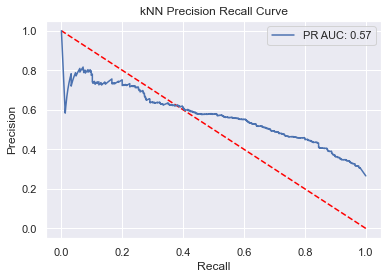

Tuned kNN ROC-AUC score: 0.79
Tuned kNN Precision Recall AUC score: 0.57
Accuracy of tuned kNN: 0.77
[[1384  165]
 [ 323  238]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1549
           1       0.59      0.42      0.49       561

    accuracy                           0.77      2110
   macro avg       0.70      0.66      0.67      2110
weighted avg       0.75      0.77      0.76      2110

Tuned k-NN Parameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


In [8]:
# k-NN model: tune hyperparameters for number of neighbors, weighting scheme and distance metric
# apply model_run_all and store y predictions and y predicted probabilities
n_neighbors = np.arange(1,21,2)
weights = ['uniform','distance']
metric = ['euclidean','manhattan','minkowski']
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors':n_neighbors,'weights':weights,'metric':metric}
knn_cv = GridSearchCV(knn,param_grid=param_grid_knn,cv=cv,scoring='accuracy')
y_knn_pred, y_knn_pred_prob = model_run_all(X_train, y_train, y_test, knn_cv,model_name='kNN')
# shows what the optimal parameters were from the grid search
print("Tuned k-NN Parameters: {}".format(knn_cv.best_params_))

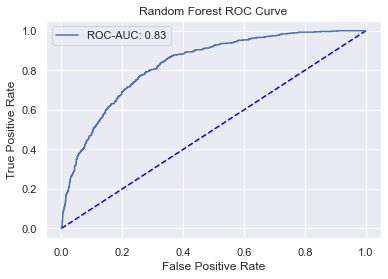

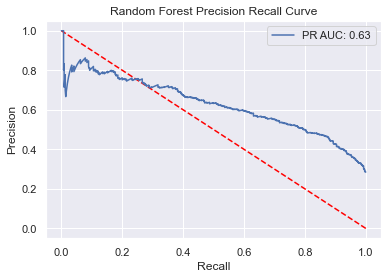

Tuned Random Forest ROC-AUC score: 0.83
Tuned Random Forest Precision Recall AUC score: 0.63
Accuracy of tuned Random Forest: 0.79
[[1397  152]
 [ 295  266]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.47      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



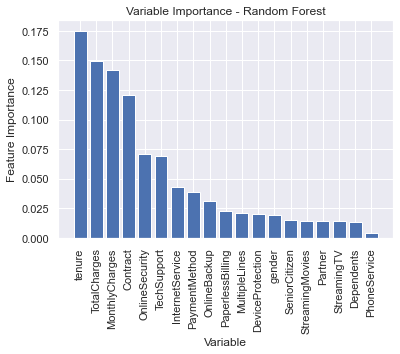

In [9]:
# Random Forest model: built with optimal hyperparameters from RandomizedSearchCV and 
# GridSearchCV process, then apply model_run_all and store y predictions and y predicted probabilities
rf_best_cv = RandomForestClassifier(n_estimators=200, min_samples_split=4,min_samples_leaf=4,max_depth=36,
                                    max_features='sqrt',bootstrap=True)
y_rf_pred, y_rf_pred_prob = model_run_all(X_train, y_train, y_test, rf_best_cv,model_name='Random Forest')

# extracting feature importances from RF model and storing in DataFrame for plotting
importances = rf_best_cv.feature_importances_
importances = pd.Series(importances)
feature_list = list(X.columns)
feature_list = pd.Series(feature_list)
feature_importance_df = pd.concat([feature_list, importances],axis=1)
feature_importance_df.columns = ['features','importance']
feature_importance_df = feature_importance_df.sort_values(by='importance',ascending=False)

# plotting feature importances with corresponding labels in bar chart, descending order of importance
plt.bar(list(range((len(importances)))), feature_importance_df['importance'], orientation='vertical')
plt.xticks(list(range((len(importances)))), feature_importance_df['features'], rotation='vertical')
plt.ylabel('Feature Importance')
plt.xlabel('Variable')
plt.title('Variable Importance - Random Forest')
plt.show()

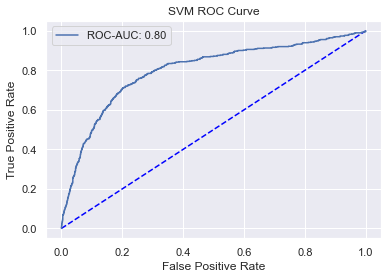

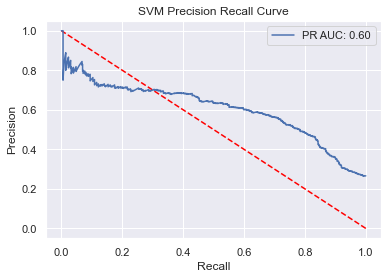

Tuned SVM ROC-AUC score: 0.80
Tuned SVM Precision Recall AUC score: 0.60
Accuracy of tuned SVM: 0.79
[[1402  147]
 [ 297  264]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1549
           1       0.64      0.47      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



In [10]:
# SVM Model: data scaled, optimal parameters entered, plug into pipeline, apply model_run_all
# and store y prediction and y predicted probabilities
svm_steps = [('scaler',preprocessing.StandardScaler()),('SVM',SVC())]
svm_cs = [10]
gammas = [.01]
probability = [True]
svm_param_grid = {'SVM__C':svm_cs, 'SVM__gamma':gammas, 'SVM__probability':probability}
svm_pipeline = Pipeline(svm_steps)
svm_cv = GridSearchCV(svm_pipeline, param_grid=svm_param_grid, cv=cv,scoring='accuracy')
y_svm_pred, y_svm_pred_prob = model_run_all(X_train, y_train, y_test, svm_cv,model_name='SVM')

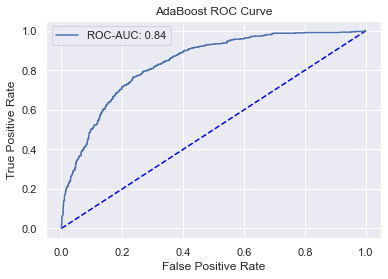

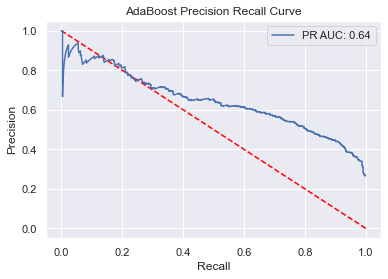

Tuned AdaBoost ROC-AUC score: 0.84
Tuned AdaBoost Precision Recall AUC score: 0.64
Accuracy of tuned AdaBoost: 0.79
[[1386  163]
 [ 273  288]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.51      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.79      0.79      2110



In [11]:
# AdaBoost model: optimal parameters entered, apply model_run_all and store y prediction
# and y predicted probabilities
# GridSearchCV tried values for n_estimators_boost of [100,200,300,400,500] and 
# values of [.001,.01,.1,1] for learning rate
n_estimators_boost = [300]
learning_rate_boost = [.1]
param_grid_boost = {'n_estimators':n_estimators_boost, 'learning_rate':learning_rate_boost}
ada = AdaBoostClassifier()
ada_cv = GridSearchCV(ada, param_grid=param_grid_boost,cv=cv, scoring='accuracy')
y_ada_pred, y_ada_pred_prob =model_run_all(X_train, y_train, y_test, ada_cv,model_name='AdaBoost')

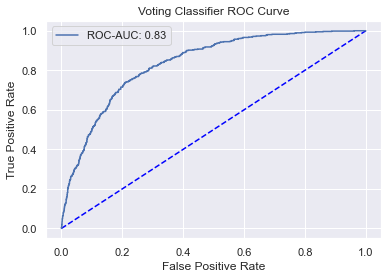

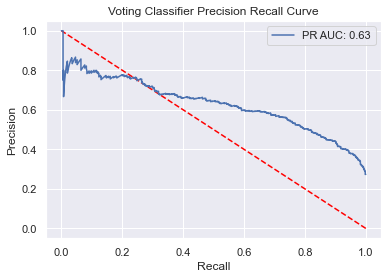

Tuned Voting Classifier ROC-AUC score: 0.83
Tuned Voting Classifier Precision Recall AUC score: 0.63
Accuracy of tuned Voting Classifier: 0.79
[[1417  132]
 [ 302  259]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1549
           1       0.66      0.46      0.54       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [12]:
# voting classifier model: plug in well-tuned models from above and specifing voting parameter to 
# be 'soft' since all models have tuned hyperparameters
my_estimators = [('knn',knn_cv),('log_reg',logreg_cv),('rf',rf_best_cv),('svm',svm_cv),('ada',ada_cv)]
vc_model = VotingClassifier(my_estimators,voting='soft')
y_vc_pred, y_vc_pred_prob = model_run_all(X_train, y_train, y_test, vc_model,model_name='Voting Classifier')

In [13]:
# RSF model
# Define X to be an array of the feature set without tenure, T to be the array of realized tenures
# and E to be the array of binary churn classifications
X_rsf = X.drop('tenure',axis=1)
T_rsf = X['tenure'].values
E_rsf = y

# store indexes from train/test split used throughout code and plug in to X, T, E arrays to 
# form train/test split for the RSF model
index_train, index_test = X_train.index, X_test.index
X_rsf_train, X_rsf_test = X_rsf.loc[index_train,:], X_rsf.loc[index_test,:]
T_rsf_train, T_rsf_test = T_rsf[index_train], T_rsf[index_test]
E_rsf_train, E_rsf_test = E_rsf[index_train], E_rsf[index_test]

C-index: 0.88


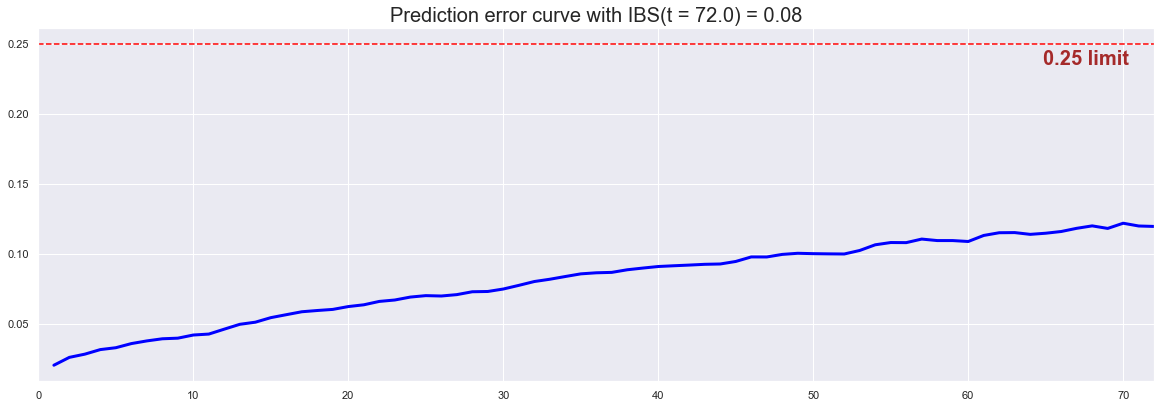

IBS: 0.08


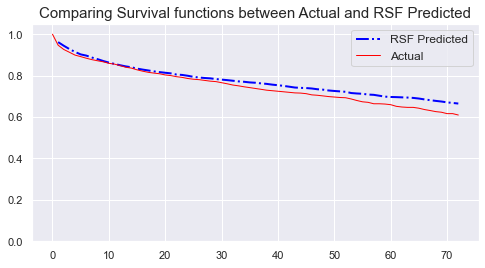

In [14]:
# defines the base survival curve for the test set; to be compared to predicted survival
# of test set later
km_base_model = KaplanMeierModel()
km_base_model.fit(T_rsf_test, E_rsf_test)

# define and fit RandomSurvivalForest model with optimal hyperparameters from RF model before
rsf = RandomSurvivalForestModel(num_trees=200)
rsf.fit(X_rsf_train,T_rsf_train,E_rsf_train,max_features='sqrt',max_depth=36,min_node_size=4,seed=21)
# Calculate and display C-index and IBS score for RSF model
c_index = concordance_index(rsf,X_rsf_test,T_rsf_test,E_rsf_test)
print('C-index: {:0.2f}'.format(c_index))
ibs = integrated_brier_score(rsf, X_rsf_test, T_rsf_test, E_rsf_test)
print('IBS: {:0.2f}'.format(ibs))
# storing predicted survival values and then taking mean to get overall survival curve for 
# all customers in the test set
survival = rsf.predict_survival(X_rsf_test.values)
survival_avg = survival.mean(axis=0)

# Initializing the figure
fig, ax = plt.subplots(figsize=(8, 4))

# plots the predicted survival curve vs. the base survival curve (or realized survival curve)
plt.plot(rsf.times, survival_avg, color='blue', label='RSF Predicted', lw=2, ls = '-.')
plt.plot(km_base_model.times, km_base_model.survival,color='red',label='Actual',lw=1)
title = "Comparing Survival functions between Actual and RSF Predicted"
plt.legend(fontsize=12)
plt.title(title, fontsize=15)
plt.ylim(0, 1.05)
plt.show()

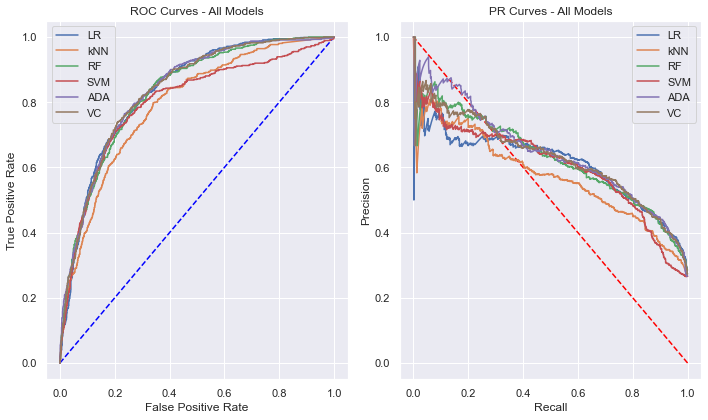

In [15]:
# plots ROC and PR curves of all models together, separated into two plots side by side
plt.figure(figsize=[10,6])
# ROC subplot
plt.subplot(1,2,1)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_logreg_pred_prob)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_knn_pred_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_pred_prob)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_svm_pred_prob)
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_ada_pred_prob)
fpr_vc, tpr_vc, _ = roc_curve(y_test, y_vc_pred_prob)
plt.plot([0,1],[0,1],'k--',color='blue')
plt.plot(fpr_logreg,tpr_logreg,label='LR')
plt.plot(fpr_knn,tpr_knn,label='kNN')
plt.plot(fpr_rf,tpr_rf,label='RF')
plt.plot(fpr_svm,tpr_svm,label='SVM')
plt.plot(fpr_ada,tpr_ada,label='ADA')
plt.plot(fpr_vc,tpr_vc,label='VC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend()
# PR subplot
plt.subplot(1,2,2)
p_logreg, r_logreg, _ = precision_recall_curve(y_test, y_logreg_pred_prob)
p_knn, r_knn, _ = precision_recall_curve(y_test, y_knn_pred_prob)
p_rf, r_rf, _ = precision_recall_curve(y_test, y_rf_pred_prob)
p_svm, r_svm, _ = precision_recall_curve(y_test, y_svm_pred_prob)
p_ada, r_ada, _ = precision_recall_curve(y_test, y_ada_pred_prob)
p_vc, r_vc, _ = precision_recall_curve(y_test, y_vc_pred_prob)
plt.plot([1,0],[0,1],'k--',color='red')
plt.plot(r_logreg,p_logreg,label='LR')
plt.plot(r_knn,p_knn,label='kNN')
plt.plot(r_rf,p_rf,label='RF')
plt.plot(r_svm,p_svm,label='SVM')
plt.plot(r_ada,p_ada,label='ADA')
plt.plot(r_vc,p_vc,label='VC')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curves - All Models')
plt.legend()
plt.tight_layout()
plt.show()

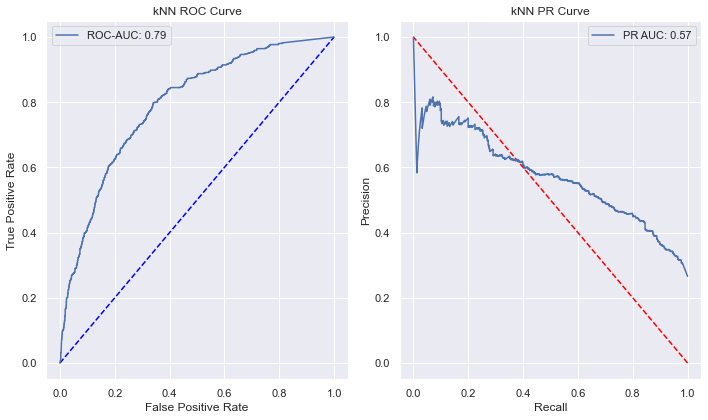

In [16]:
# plots ROC and PR curves of kNN model together, separated into two plots side by side
plt.figure(figsize=[10,6])
# ROC subplot
plt.subplot(1,2,1)
plt.plot([0,1],[0,1],'k--',color='blue')
plt.plot(fpr_knn,tpr_knn,label='ROC-AUC: %0.2f'%roc_auc_score(y_test, y_knn_pred_prob))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('kNN ROC Curve')
plt.legend()
# PR subplot
plt.subplot(1,2,2)
plt.plot([1,0],[0,1],'k--',color='red')
plt.plot(r_knn,p_knn,label='PR AUC: %0.2f'%(auc(r_knn,p_knn)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('kNN PR Curve')
plt.legend()
plt.tight_layout()
plt.show()